<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 3rd exercise: <font color="#C70039">Do DBScan clustering for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Date:   04.08.2025

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/400px-DBSCAN-Illustration.svg.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for using the DBScan clustering algorithm for anomaly detection.

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time. 
4. take the three data sets from exercize 1 and cluster them
5. read the following <a href="https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan">article</a> for getting help estimating eps and minPts
    * https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan
6. describe your findings and interpret the results
-----------------------------------------------------------------------------------

In [5]:
from sklearn.cluster import DBSCAN
import numpy as np
from numpy.random import randn
import pandas as pd
np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

In [6]:
# Not normally distributed
df_nnorm = pd.read_csv("data/Ex1/Coca_Cola_historical_data.csv") 
# First normally distributed
df_norm1 = pd.read_csv("data/Ex1/random_fitness_dataset.csv") 
# Second normally distributed
df_norm2 = pd.read_csv("data/Ex1/SOCR-HeightWeight.csv") 

## Approach to find out eps and minPts
"minPts is selected based on the domain knowledge. If you do not have domain understanding, a rule of thumb is to derive minPts from the number of dimensions D in the data set. minPts >= D + 1. For 2D data, take minPts = 4. For larger datasets, with much noise, it suggested to go with minPts = 2 * D.

Once you have the appropriate minPts, in order to determine the optimal eps, follow these steps -

Let's say minPts = 24

For every point in dataset, compute the distance of it's 24th nearest neighbor. (generally we use euclidean distance, but you can experiment with different distance metrics).
Sort the distances in the increasing order.
Plot the chart of distances on Y-axis v/s the index of the datapoints on X-axis.
Observe the sudden increase or what we popularly call as an 'elbow' or 'knee' in the plot. Select the distance value that corresponds to the 'elbow' as optimal eps."

## Coca Cola Close Price

In [18]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import pandas as pd


data_nnorm = df_nnorm['Close'].values.reshape(-1, 1)

min_pts = 2

neighbors = NearestNeighbors(n_neighbors=min_pts, metric='euclidean', algorithm='auto')
neighbors_fit = neighbors.fit(data_nnorm)

# 'distances' contains the distance of a point to its k-neighbors
# 'indices' contains the indices of those neighbors
distances, indices = neighbors_fit.kneighbors(data_nnorm)

# Get the distance to the k-th (4th) nearest neighbor
# Since the distances array includes the distance to the point itself,
# the 4th nearest neighbor distance is at index 'min_pts - 1', which is 3.
# We are sorting the rows of 'distances' and then taking the last column.
k_distances = distances[:, min_pts - 1]

# Sort the distances in ascending order
k_distances = np.sort(k_distances, axis=0)

# The 'k_distances' array is now ready for plotting on the Y-axis.
print("First 10 sorted 4-distances:")
print(k_distances[:10])
print(f"\nTotal number of data points: {len(k_distances)}")


First 10 sorted 4-distances:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Total number of data points: 16066


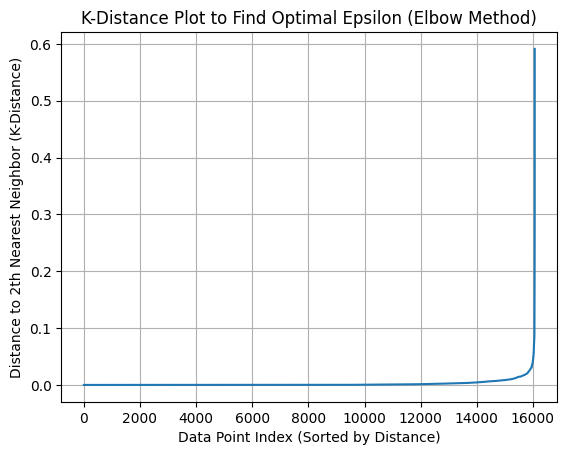

In [19]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(k_distances)), k_distances)
plt.xlabel("Data Point Index (Sorted by Distance)")
plt.ylabel(f"Distance to {min_pts}th Nearest Neighbor (K-Distance)")
plt.title("K-Distance Plot to Find Optimal Epsilon (Elbow Method)")
plt.grid()
plt.show()

In [23]:
# hyperparameters
minPts = 2
eps = 0.025

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

clusters = outlier_detection.fit_predict(data_nnorm)

list(clusters).count(-1)

191

### Result
Using DBSCAN with these parameters lead to finding 191 outliers.

In [22]:
# hyperparameters
minPts = 4
eps = 0.025

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

clusters = outlier_detection.fit_predict(data_nnorm)

list(clusters).count(-1)

696

### Result
Using DBSCAN with these parameters lead to finding 696 outliers.

## Fitness Dataset 'calories_burned'

In [33]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import pandas as pd


data_norm1 = df_norm1['calories_burned'].values.reshape(-1, 1)

min_pts = 2

neighbors = NearestNeighbors(n_neighbors=min_pts, metric='euclidean', algorithm='auto')
neighbors_fit = neighbors.fit(data_norm1)

# 'distances' contains the distance of a point to its k-neighbors
# 'indices' contains the indices of those neighbors
distances, indices = neighbors_fit.kneighbors(data_norm1)

# Get the distance to the k-th (4th) nearest neighbor
# Since the distances array includes the distance to the point itself,
# the 4th nearest neighbor distance is at index 'min_pts - 1', which is 3.
# We are sorting the rows of 'distances' and then taking the last column.
k_distances = distances[:, min_pts - 1]

# Sort the distances in ascending order
k_distances = np.sort(k_distances, axis=0)

# The 'k_distances' array is now ready for plotting on the Y-axis.
print("First 10 sorted 4-distances:")
print(k_distances[:10])
print(f"\nTotal number of data points: {len(k_distances)}")


First 10 sorted 4-distances:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Total number of data points: 200


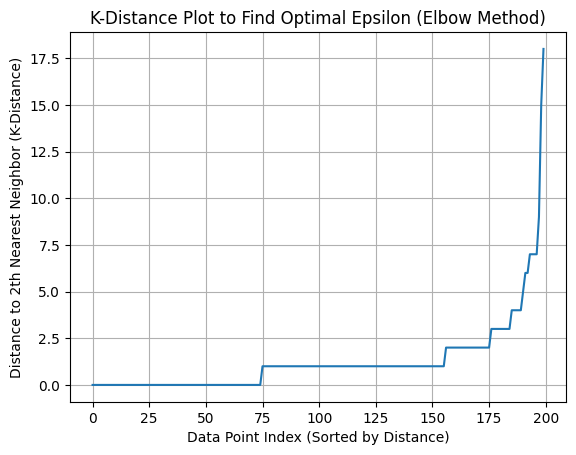

In [34]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(k_distances)), k_distances)
plt.xlabel("Data Point Index (Sorted by Distance)")
plt.ylabel(f"Distance to {min_pts}th Nearest Neighbor (K-Distance)")
plt.title("K-Distance Plot to Find Optimal Epsilon (Elbow Method)")
plt.grid()
plt.show()

In [25]:
# hyperparameters
minPts = 2
eps = 1.2

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

clusters = outlier_detection.fit_predict(data_norm1)

list(clusters).count(-1)

44

### Result
Using DBSCAN with these parameters lead to finding 44 outliers.

In [24]:
# hyperparameters
minPts = 4
eps = 1.2

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

clusters = outlier_detection.fit_predict(data_norm1)

list(clusters).count(-1)

131

### Result
Using DBSCAN with these parameters lead to finding 131 outliers.

## Height Dataset

In [27]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import pandas as pd


data_norm2 = df_norm2['Height(Inches)'].values.reshape(-1, 1)

min_pts = 2

neighbors = NearestNeighbors(n_neighbors=min_pts, metric='euclidean', algorithm='auto')
neighbors_fit = neighbors.fit(data_norm2)

# 'distances' contains the distance of a point to its k-neighbors
# 'indices' contains the indices of those neighbors
distances, indices = neighbors_fit.kneighbors(data_norm2)

# Get the distance to the k-th (4th) nearest neighbor
# Since the distances array includes the distance to the point itself,
# the 4th nearest neighbor distance is at index 'min_pts - 1', which is 3.
# We are sorting the rows of 'distances' and then taking the last column.
k_distances = distances[:, min_pts - 1]

# Sort the distances in ascending order
k_distances = np.sort(k_distances, axis=0)

# The 'k_distances' array is now ready for plotting on the Y-axis.
print("First 10 sorted 4-distances:")
print(k_distances[:10])
print(f"\nTotal number of data points: {len(k_distances)}")


First 10 sorted 4-distances:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Total number of data points: 25000


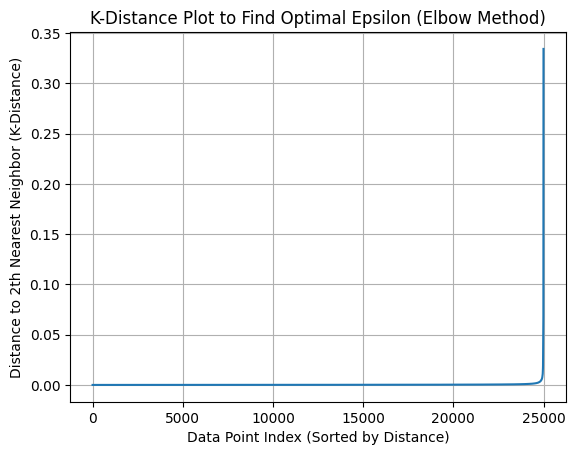

In [28]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(k_distances)), k_distances)
plt.xlabel("Data Point Index (Sorted by Distance)")
plt.ylabel(f"Distance to {min_pts}th Nearest Neighbor (K-Distance)")
plt.title("K-Distance Plot to Find Optimal Epsilon (Elbow Method)")
plt.grid()
plt.show()

In [29]:
# hyperparameters
minPts = 2
eps = 0.01

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

clusters = outlier_detection.fit_predict(data_norm2)

list(clusters).count(-1)

54

### Result
Using DBSCAN with these parameters lead to finding 54 outliers.

In [30]:
# hyperparameters
minPts = 4
eps = 0.01

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

clusters = outlier_detection.fit_predict(data_norm2)

list(clusters).count(-1)

152

### Result
Using DBSCAN with these parameters lead to finding 152 outliers.

# Conclusion
All datasets have been tested with minPts = 2 and minPts = 4, to compare different distributions and the impacts.

### Coca Cola Close Price: 
When MinPts increased from 2 to 4, the number of detected outliers more than tripled from 191/16066 to 696/16066. This is because now a point needs to have 4 points within 0.025 range to form a cluster and due to the high increase of Close price over a short time, compared to the rest of the data, the increase becomes inherently sparse and therefore many more points at the end of the range become classified as outliers.
In other words, with 2 points, the model mostly classifies the price peaks as outliers, but with 4 points it also classifies the points leading up to the peak as outliers.

### Fitness Dataset 'calories_burned'
The outlier count tripled when minPts increased from 2 to 4, resulting in a majority of the data 131/200 (44/200 for 2 pts.) being classified as noise. 
With minPts = 2 most of the data points could form a cluster. But with 4 points, leaving eps = 1.2, most datapoints couldn't form a cluster anymore, since the datapoints are too sparse. Making a reevaluation of the minPts sensible

### Height Dataset
The number of outliers roughly tripled (from 54/25000 to 152/25000) when minPts was increased from 2 to 4. However, the overall percentage of outliers remains extremely under 1%. Since this distribution is extremely dense, satisfying 2 and 4 points was rather easy for most data points. The outliers are point that lie war out in the tails of the distribution.